In [1]:
import torchaudio
from audiolm_pytorch import SoundStream
import torch
import utils.exploratoryUtils as exU
from matplotlib import pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
testTess = torchaudio.load("/home/ckwdani/Music/emotionDatasets/converted/tess/OAF_happy/OAF_beg_happy.flac")
soundstream = SoundStream(
    codebook_size = 1024,
    rq_num_quantizers = 8,
   attn_window_size = 256,       # local attention receptive field at bottleneck
    attn_depth = 2).to(device)
with torch.no_grad():
    soundstream.load("/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/models/soundstream_model/soundstream.44000.pt")
    testForward = soundstream(testTess[0].to(device), return_encoded = True)


2023-04-15 12:29:00.024909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 12:29:00.532787: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-15 12:29:00.532846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-15 12:29:00.532850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
len(testTess[0][0])

32186

In [5]:
import numpy as np
from PIL import Image


img = Image.open("/home/ckwdani/Downloads/stalin_resize.jpg").convert('L')

# Convert the image to a NumPy array
img_arr = np.array(img)

sp = soundstream(torch.unsqueeze(torch.tensor((img_arr.flatten() / 255)-1, dtype=torch.float), dim=0).to(device), return_encoded = True)
back = soundstream.decoder(sp[0])

In [21]:
back1 = back.detach()[0][0].numpy()
back2 = np.append(back1, np.zeros(len(img_arr.flatten()) - len(back1)))
len(back2)

53200

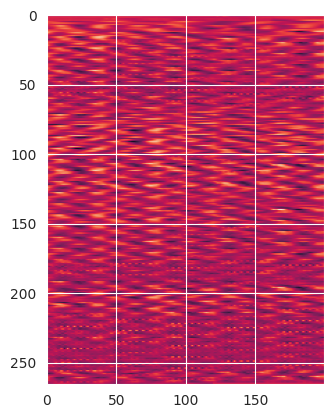

In [23]:
plt.imshow(np.reshape((back2+1)*255, newshape=img_arr.shape))

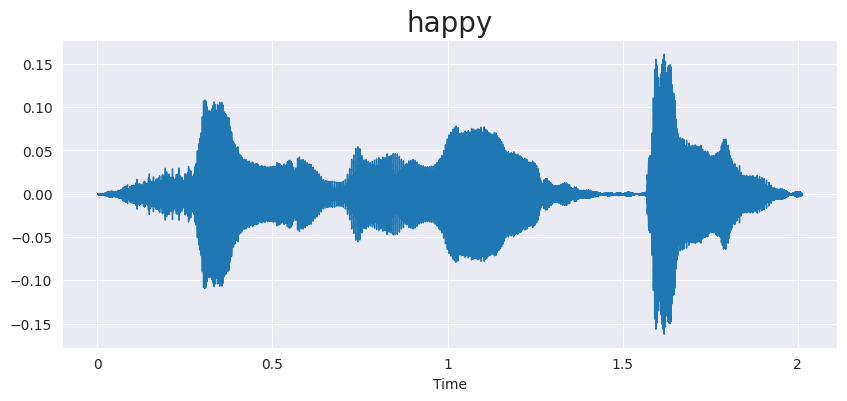

In [36]:
exU.waveplot(testTess[0][0].numpy(), 16000, "happy")

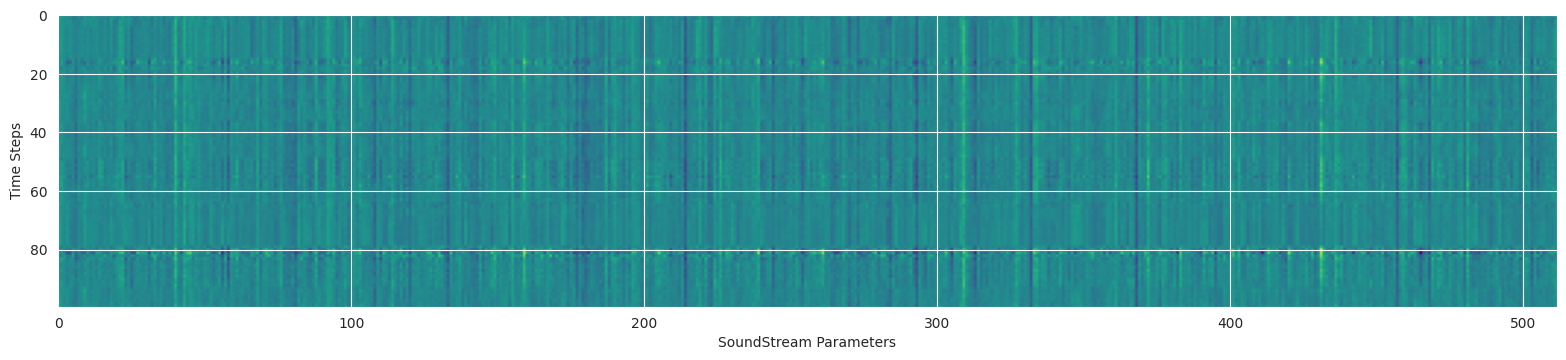

In [83]:
figure = plt.figure(figsize=(20, 10), facecolor="none")
# figure.patch.set_alpha(0.0)
axs = plt.axes()

axs.set_xlabel('SoundStream Parameters')
axs.set_ylabel('Time Steps')
# axs.set_ylabel('dsf')

axs.set_facecolor("white")
axs.patch.set_facecolor('white') # set the background to be transparent
# axs.text(0.5, 0.5, 'Hello', transform=axs.transAxes)
figure.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9)
#axs.ylabel('Arousal')
#
#
plt.imshow(testForward[0][0].T.cpu().numpy(), cmap="viridis")
